In [18]:
import tensorflow as tf
from  tensorflow.keras.datasets import cifar10
from  tensorflow.keras.utils import to_categorical
from  tensorflow.keras.layers import Input, Flatten, Dense
from  tensorflow.keras.models import Model
from  tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [10]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [12]:
x_train[54, 12, 13, 1] 

0.36862746

함수형 API 네트워크

In [13]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 200)               614600    
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)
# shuffle=True : 훈련스탭마다 배치를 훈련데이터에서 중복을 허용하지 않고 랜덤추출

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 1.8471 - accuracy: 0.3331
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6691 - accuracy: 0.4024
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5882 - accuracy: 0.4334
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5352 - accuracy: 0.4512
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4969 - accuracy: 0.4673
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4704 - accuracy: 0.4755
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4413 - accuracy: 0.4876
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4182 - accuracy: 0.4949
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3991 - accuracy: 0.5054
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.383

In [16]:
model.evaluate(x_test, y_test)
# [손실값, 정확도]

313/313 [==============================] - 1s 1ms/step - loss: 1.4775 - accuracy: 0.4673


[1.4775359630584717, 0.4672999978065491]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

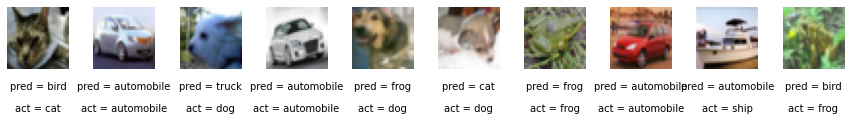

In [20]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)